In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as skl
from random import randint, uniform

In [56]:
data = pd.read_csv('../../data/clean/Delitos y Desempleos/delitos_desempleos_merged_(deltas_mensuales).csv')
data

,Distrito,Tipo I,Ases.,Viol.,Robo,Agr. Grave,Esc.,Apr. I,H. Auto,Date,Tasa de Desempleo,Num. Personas Desempleadas,Num. Personas Empleadas,Num. Personas Grupo Trabajador
0,Adjuntas,34.0,0.0,0.0,4.0,1.0,12.0,16.0,1.0,2010-01-01,19.7,1063.0,3959.0,5263.0
1,Ponce,243.0,4.0,0.0,26.0,14.0,52.0,123.0,24.0,2010-01-01,14.8,9336.0,51648.0,56538.0
2,Peñuelas,12.0,0.0,0.0,2.0,0.0,6.0,2.0,2.0,2010-01-01,20.2,1859.0,7205.0,7680.0
3,Patillas,13.0,0.0,0.0,0.0,4.0,6.0,3.0,0.0,2010-01-01,23.5,1704.0,4639.0,6241.0
4,Orocovis,22.0,0.0,0.0,0.0,0.0,10.0,12.0,0.0,2010-01-01,23.8,1206.0,4138.0,6018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9823,Orocovis,3.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,2020-08-01,12.2,579.0,4158.0,4737.0
9824,Patillas,8.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,2020-08-01,9.5,372.0,3534.0,3906.0
9825,Peñuelas,6.0,0.0,0.0,1.0,1.0,1.0,3.0,0.0,2020-08-01,10.1,549.0,4868.0,5417.0
9826,Ponce,54.0,1.0,1.0,3.0,16.0,3.0,29.0,1.0,2020-08-01,8.2,3524.0,39710.0,43234.0


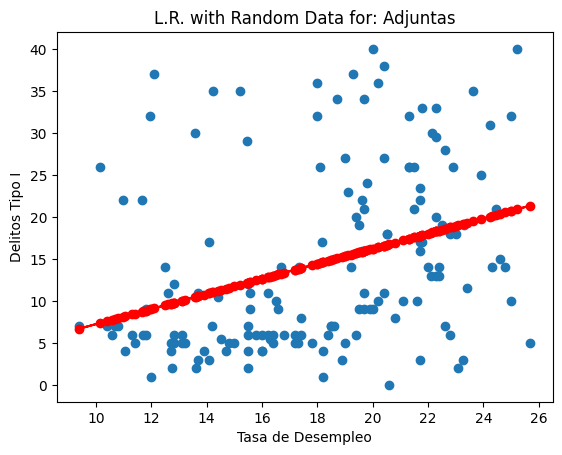

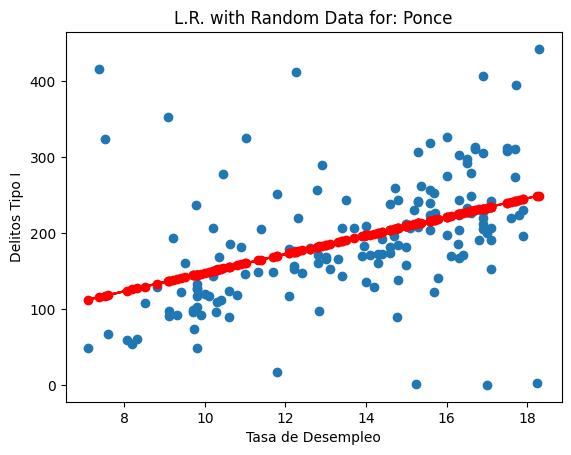

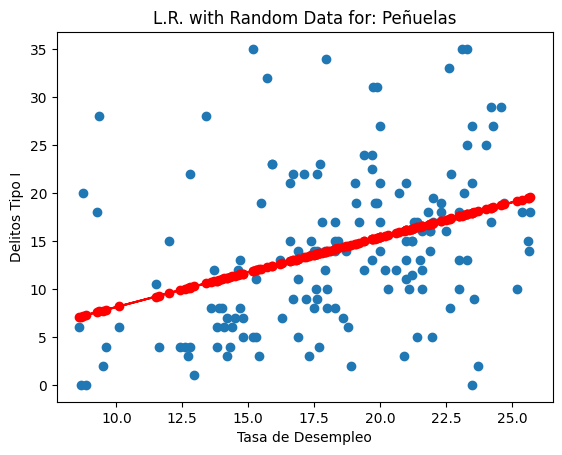

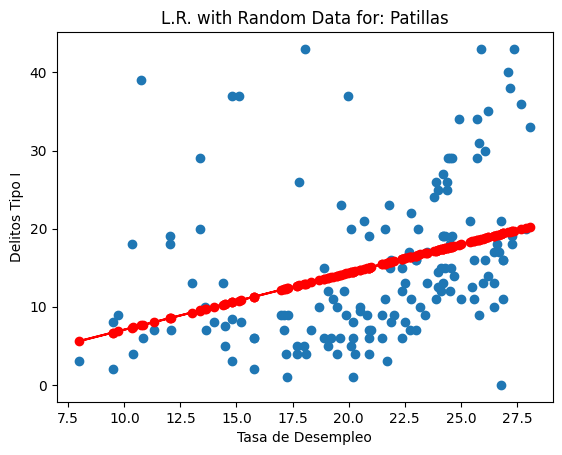

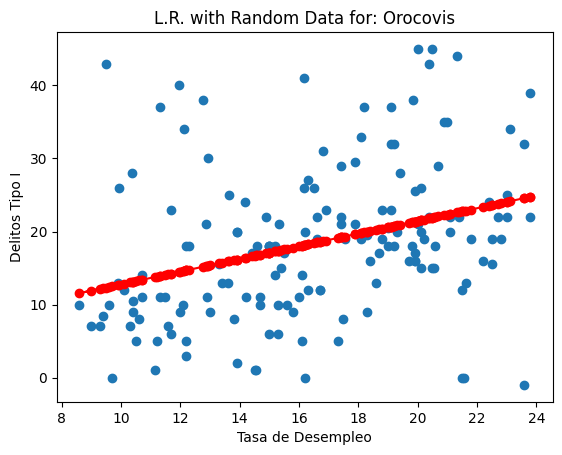

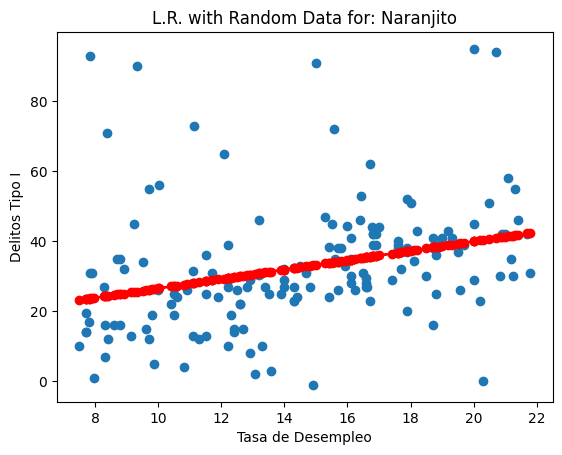

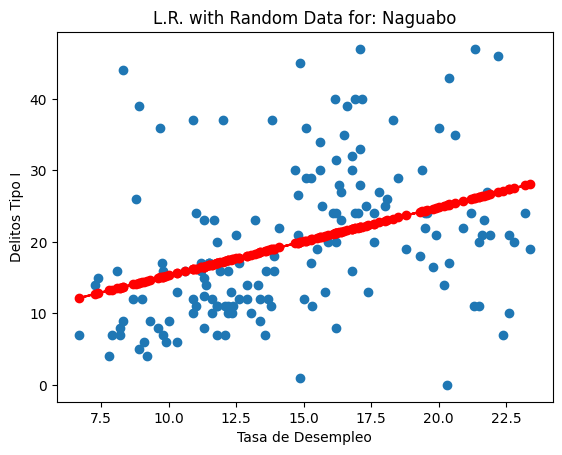

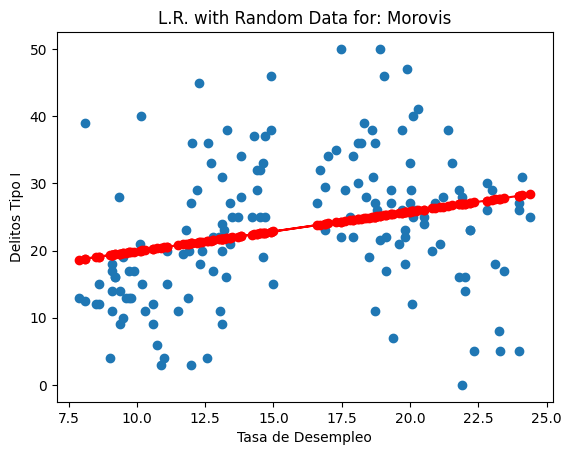

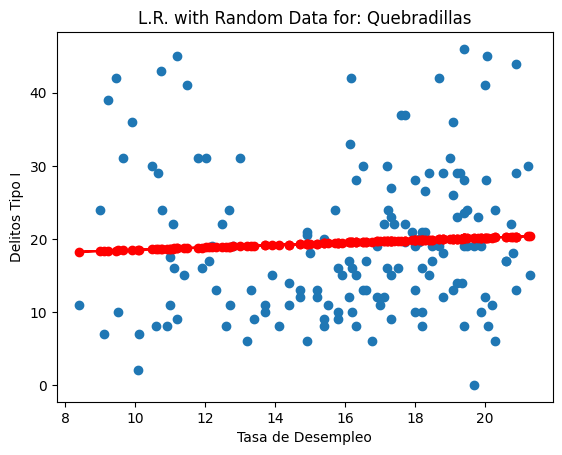

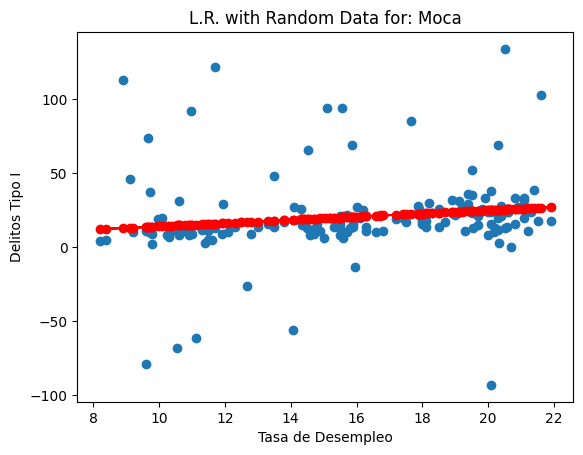

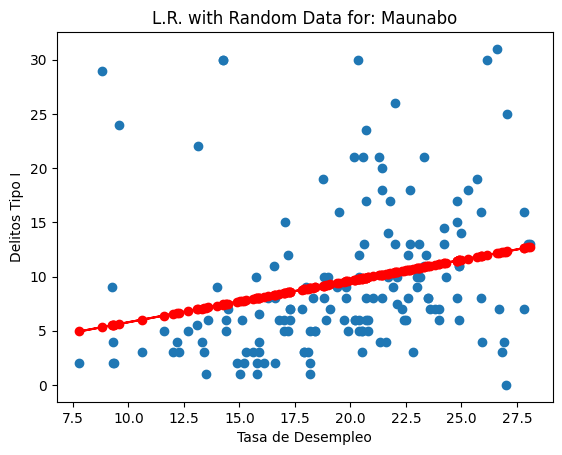

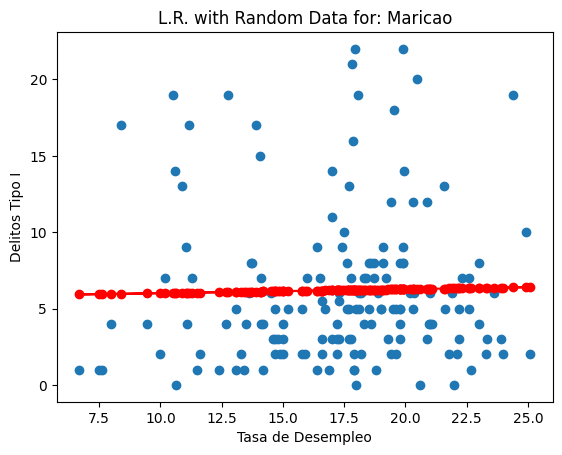

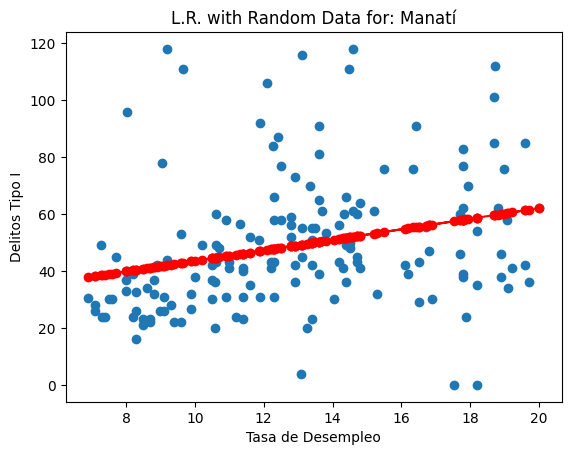

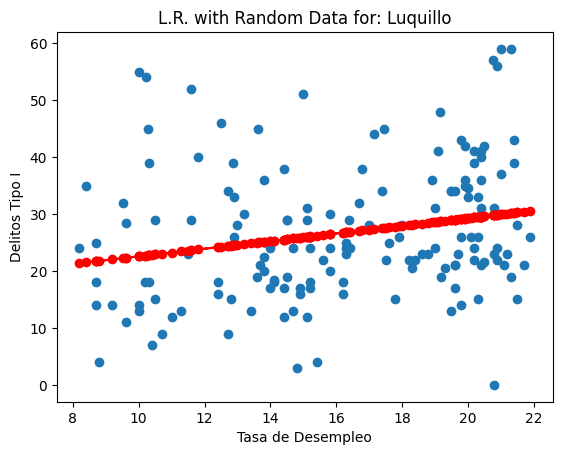

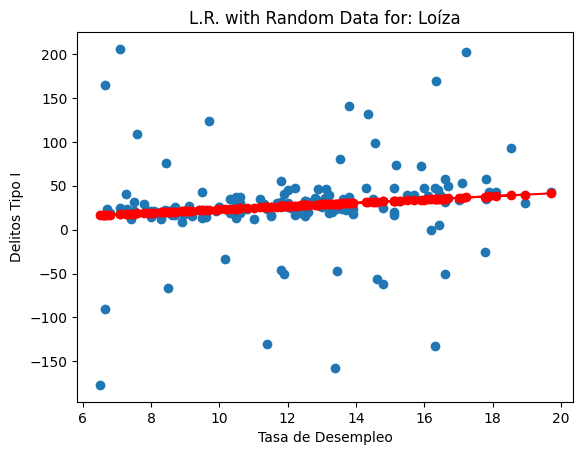

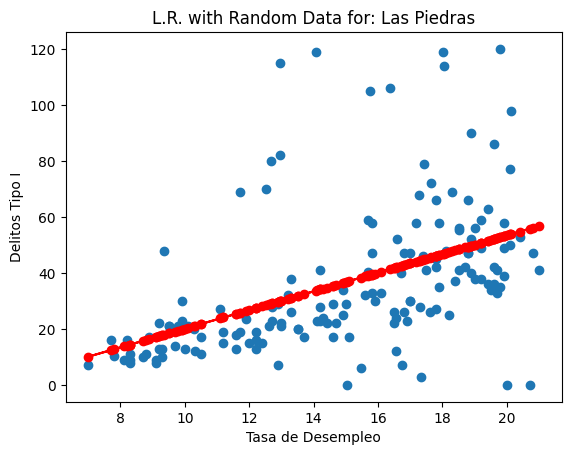

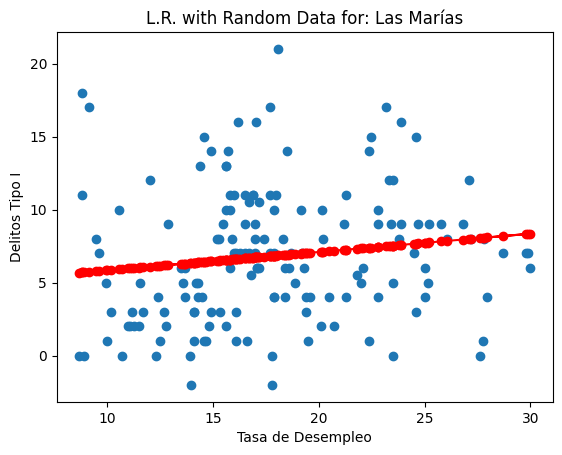

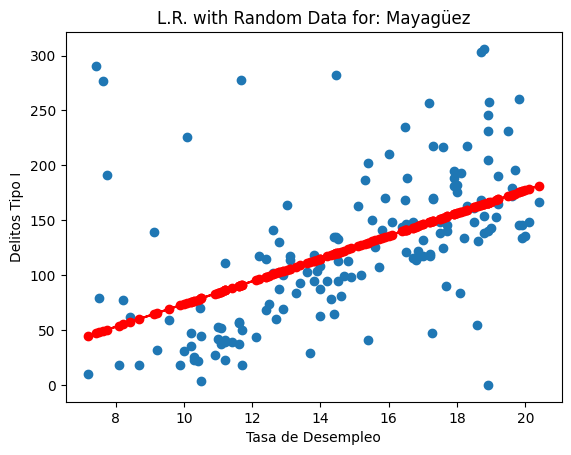

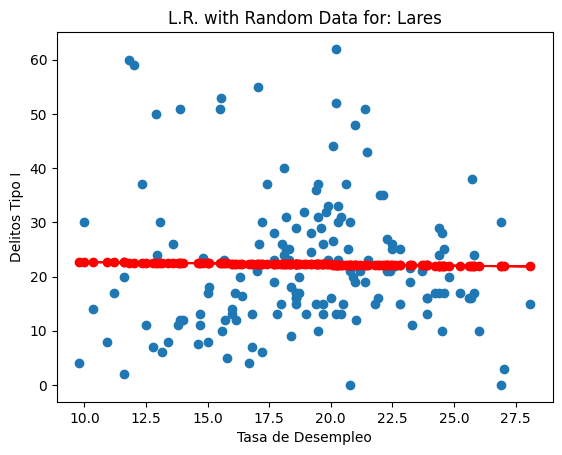

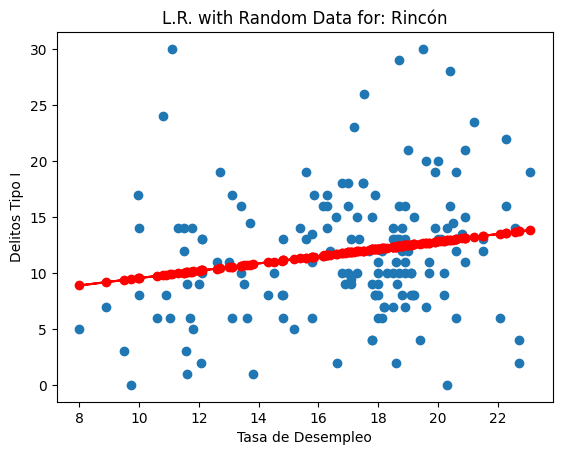

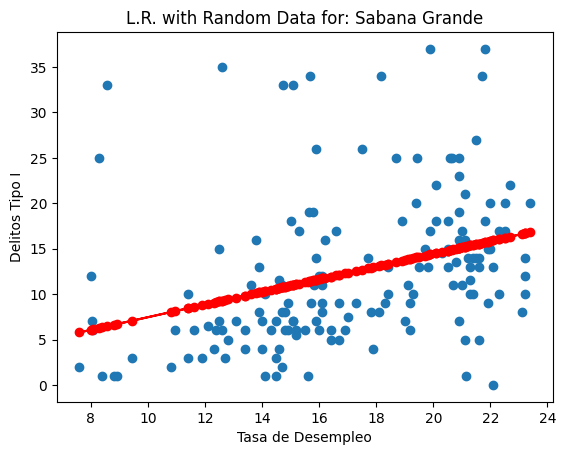

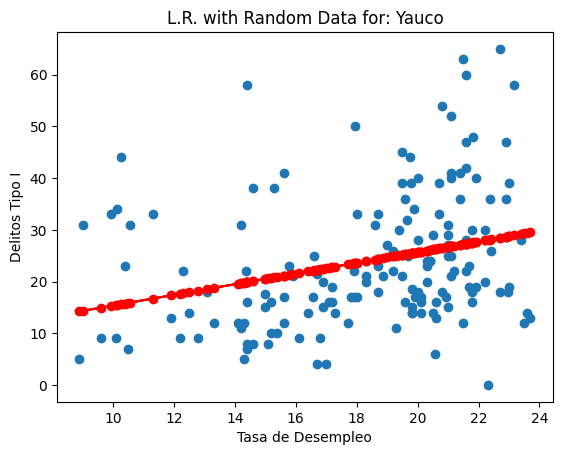

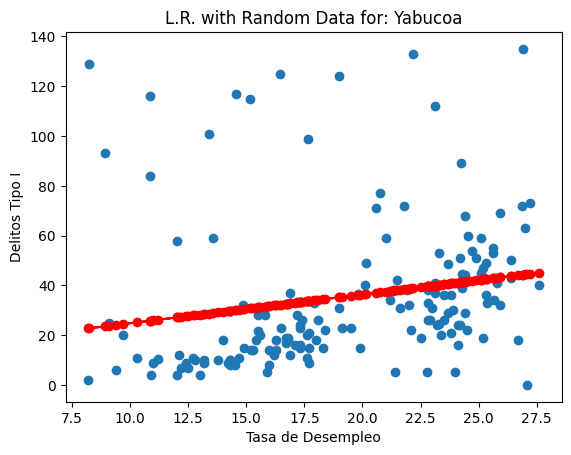

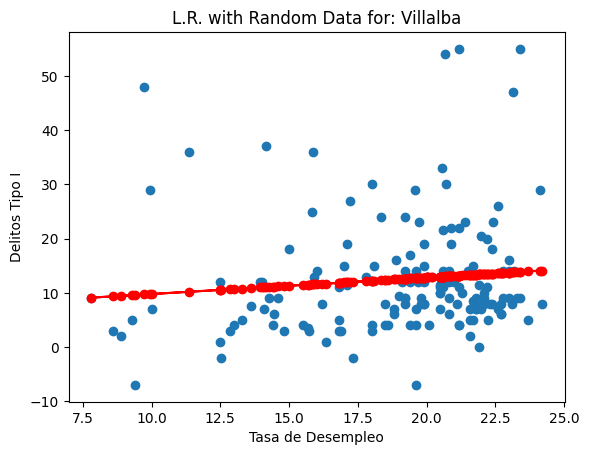

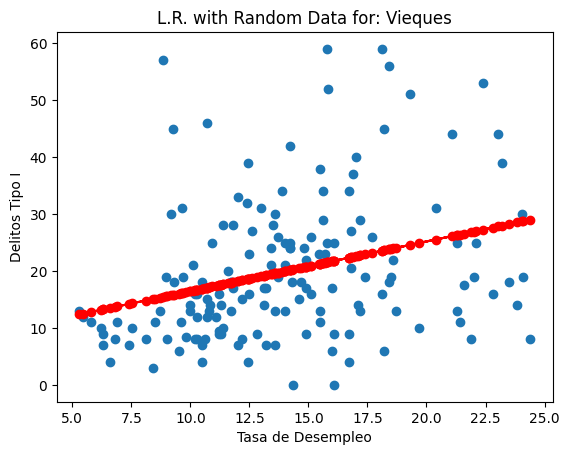

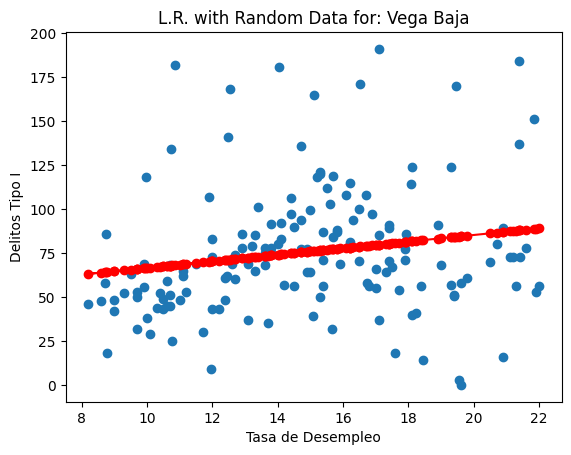

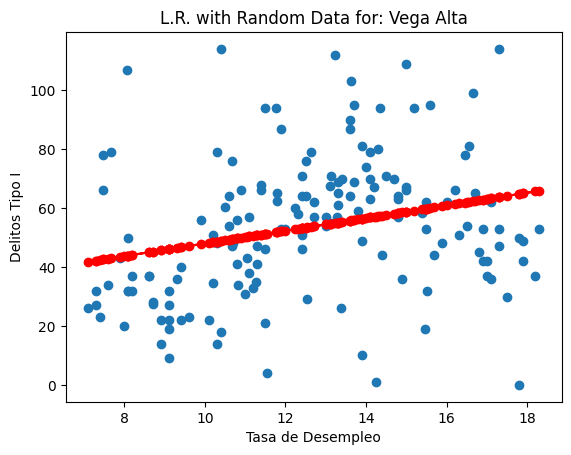

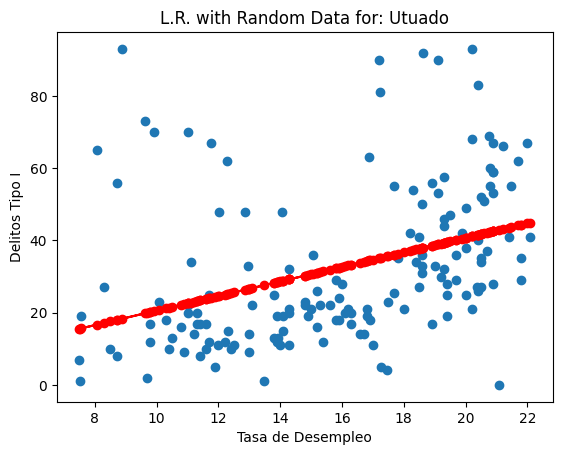

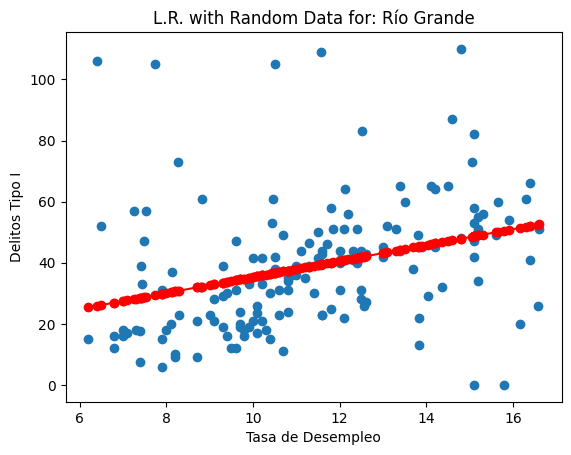

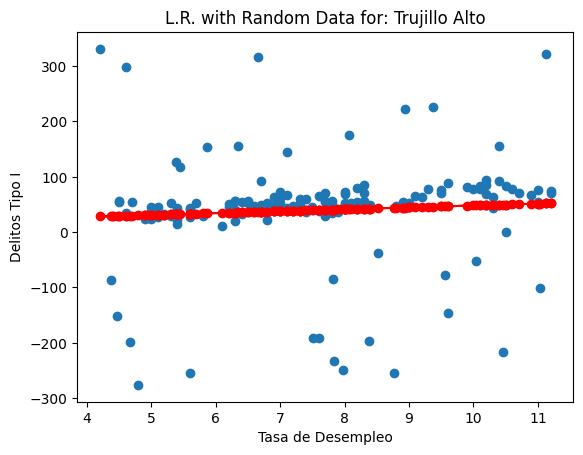

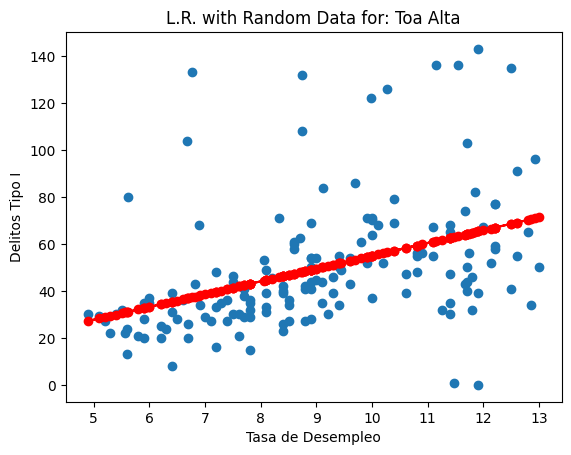

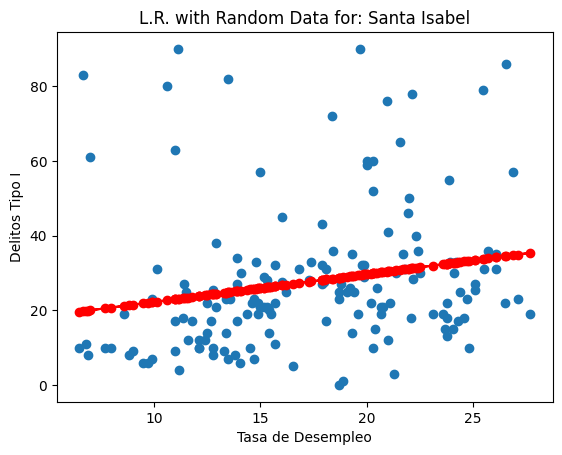

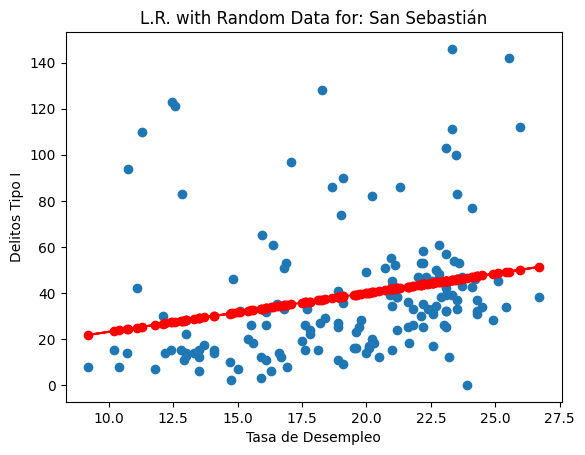

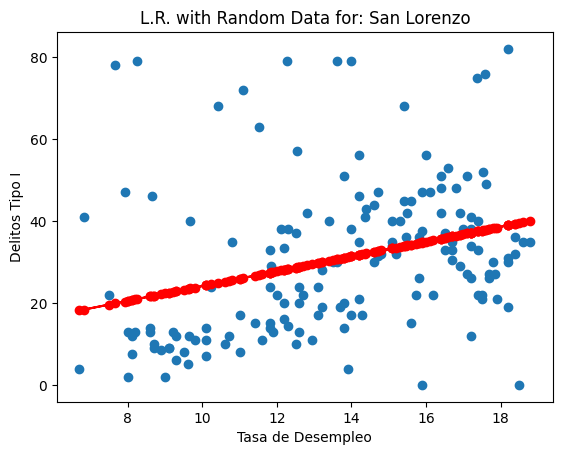

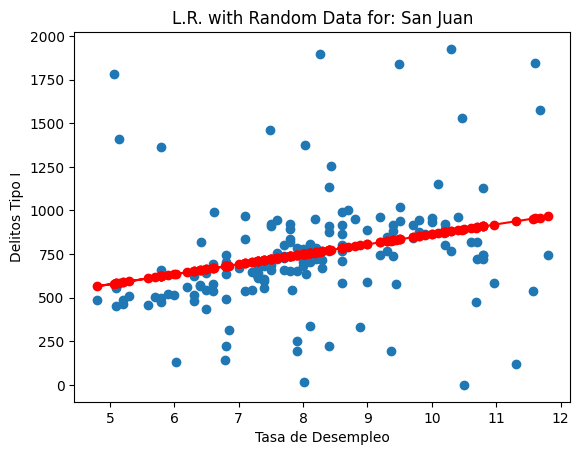

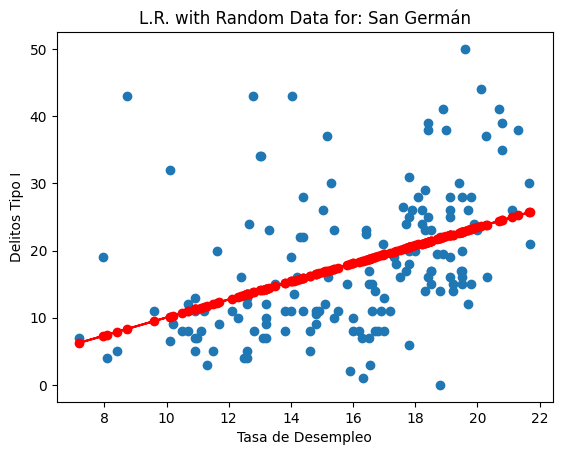

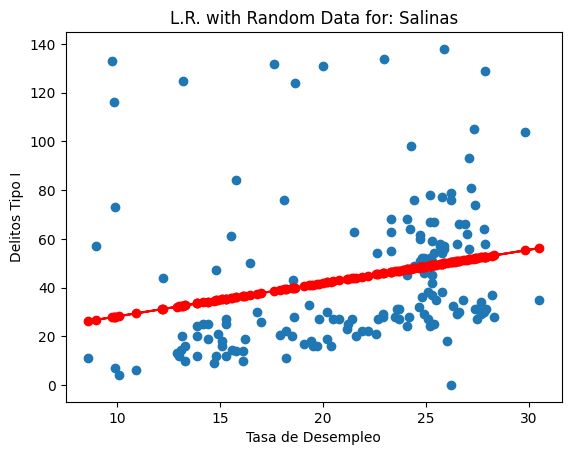

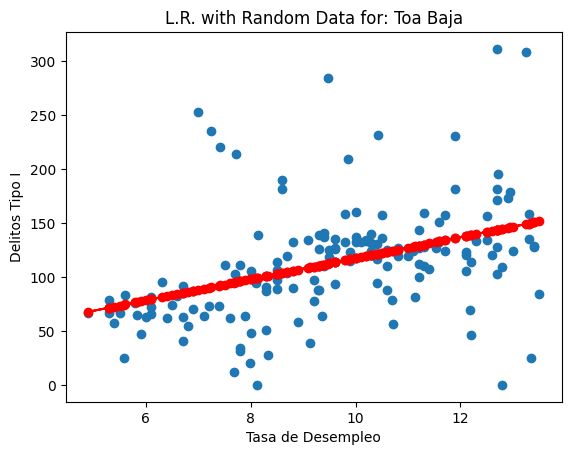

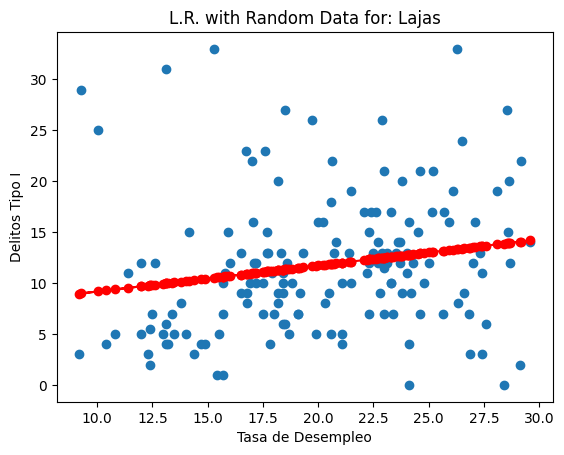

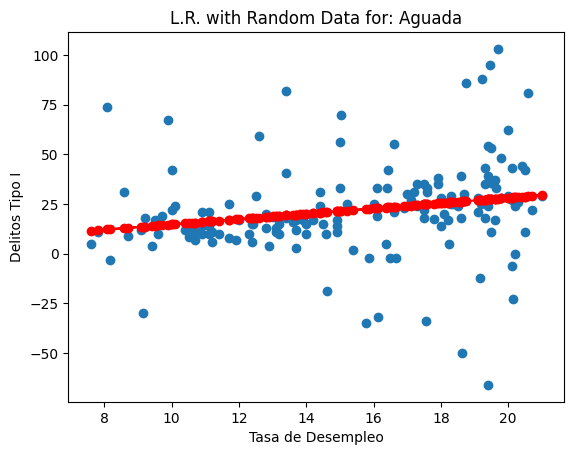

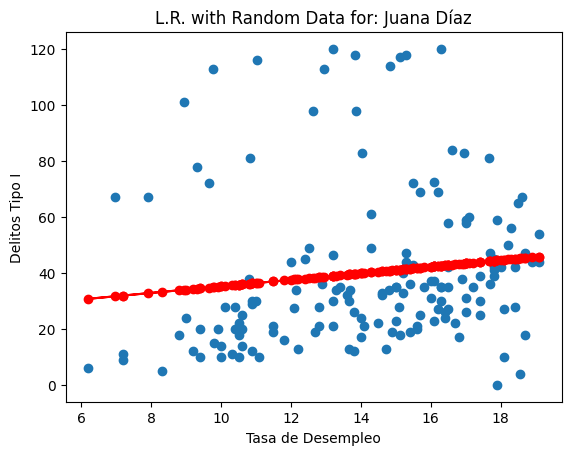

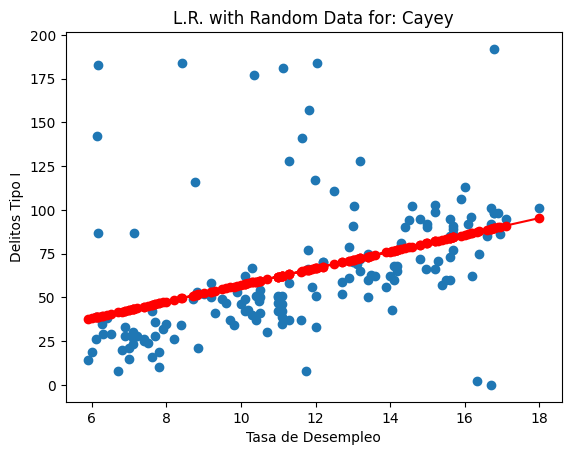

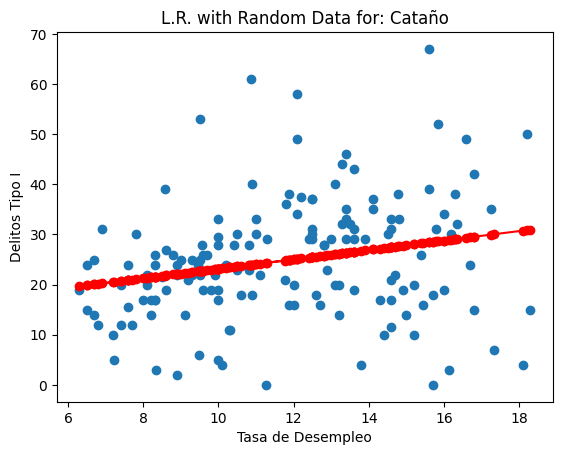

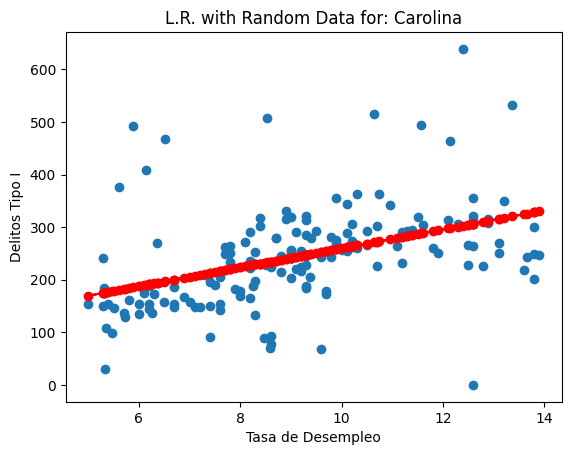

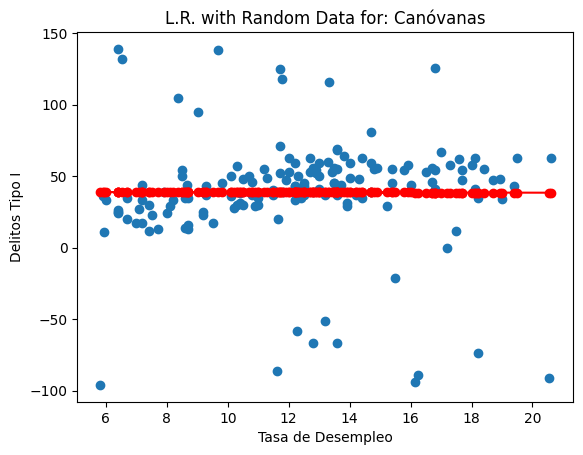

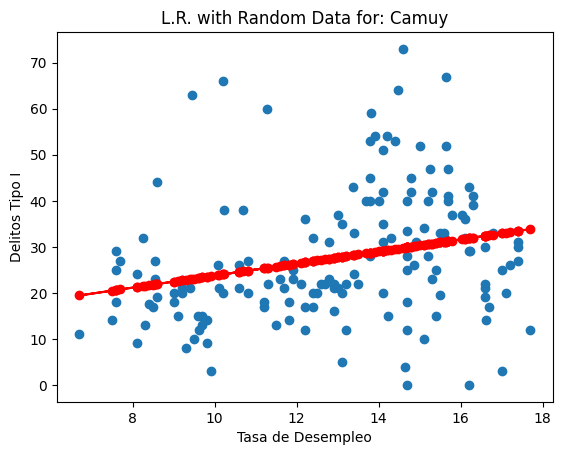

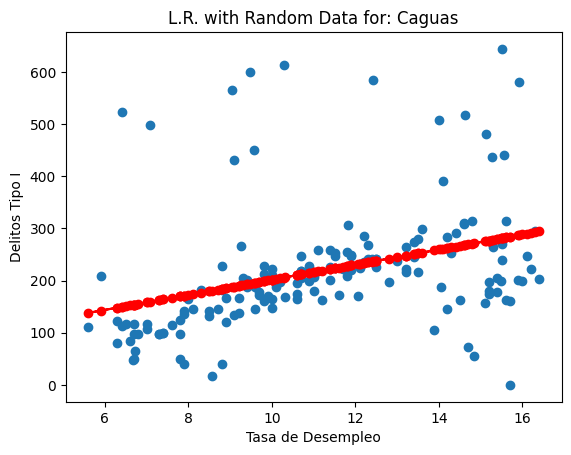

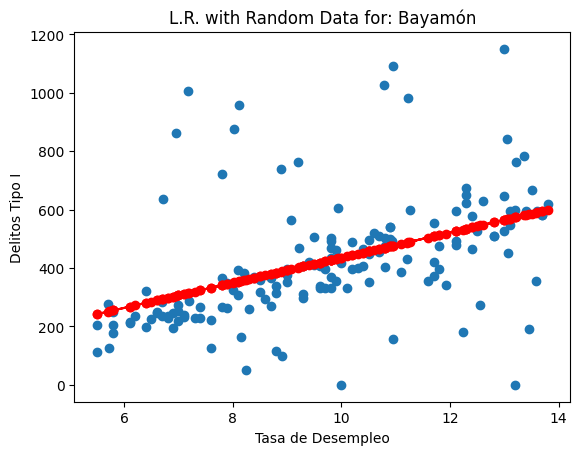

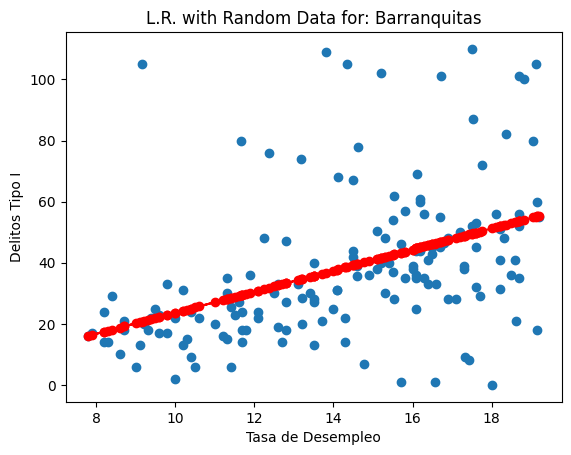

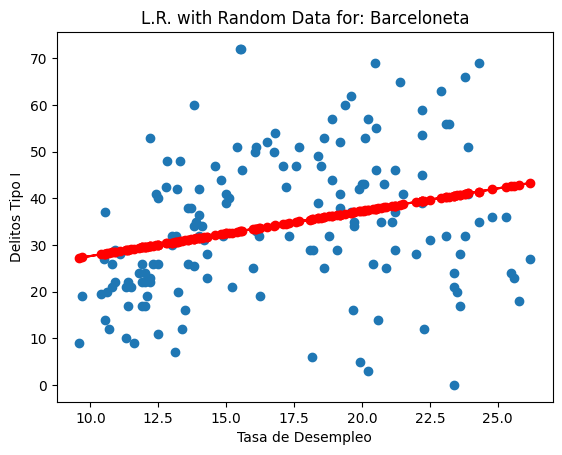

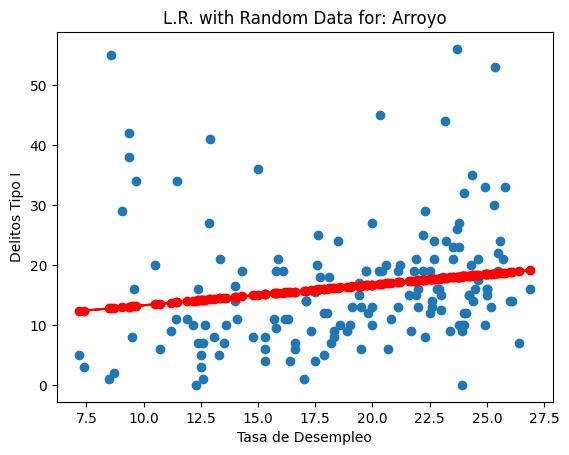

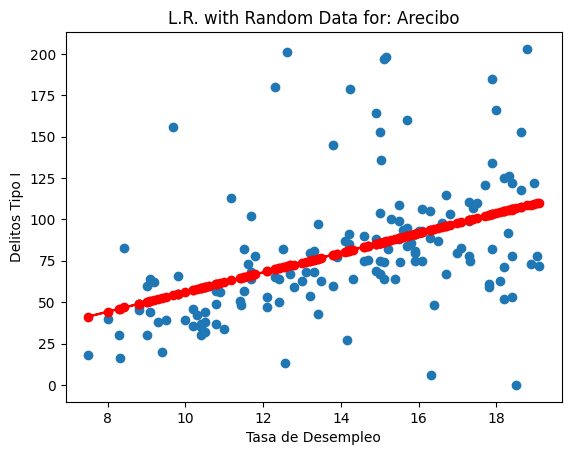

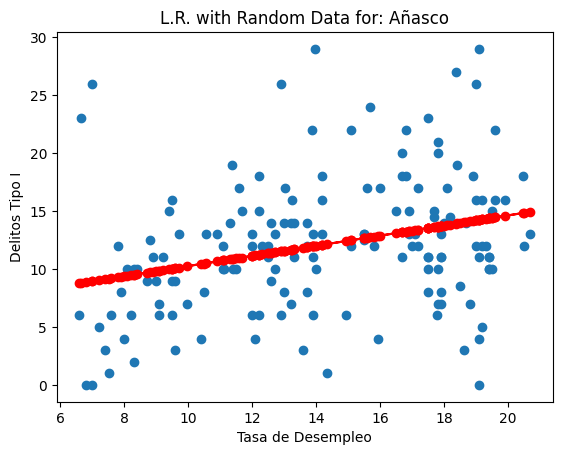

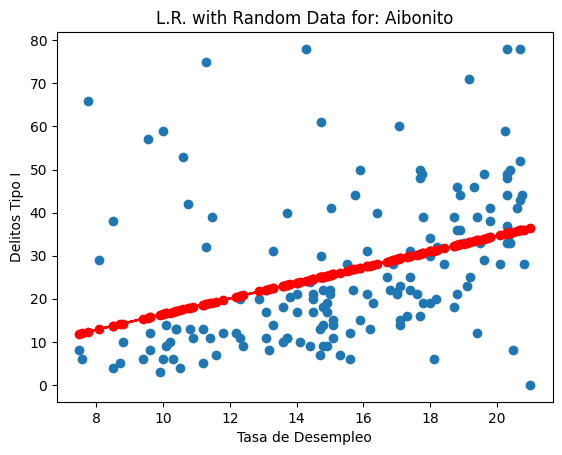

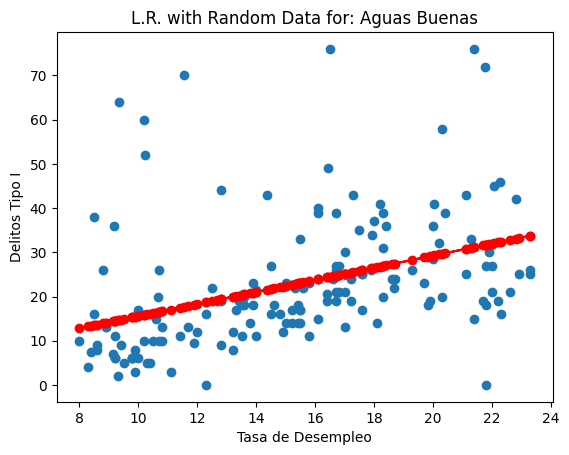

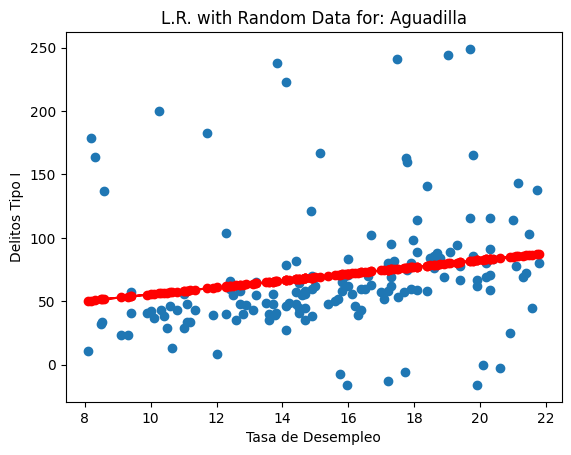

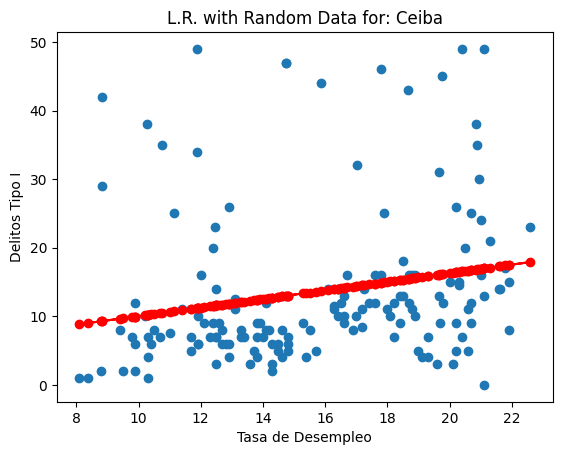

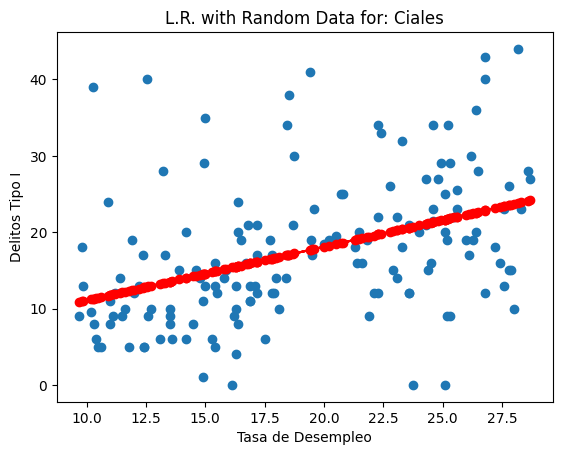

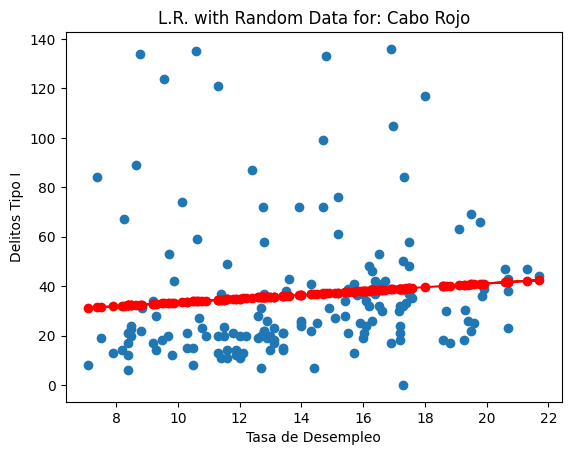

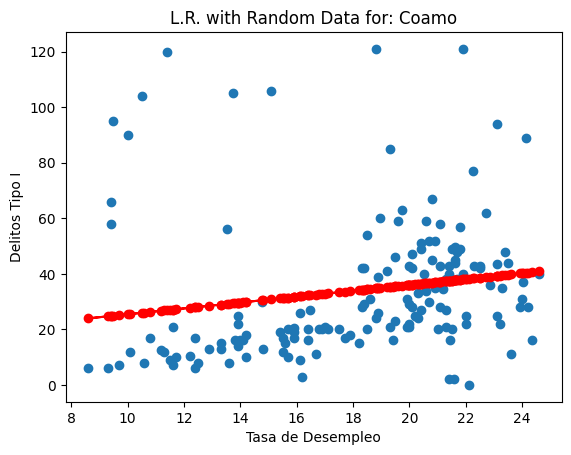

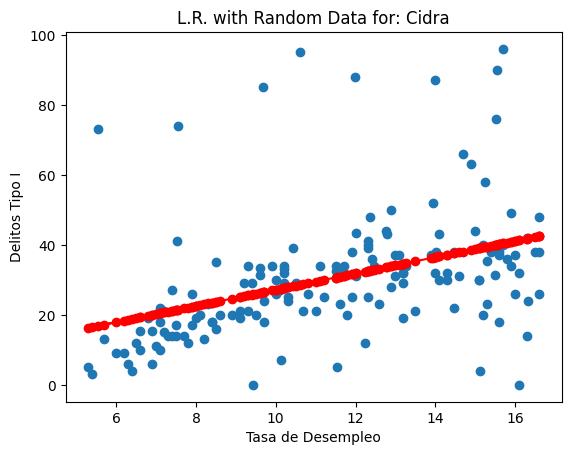

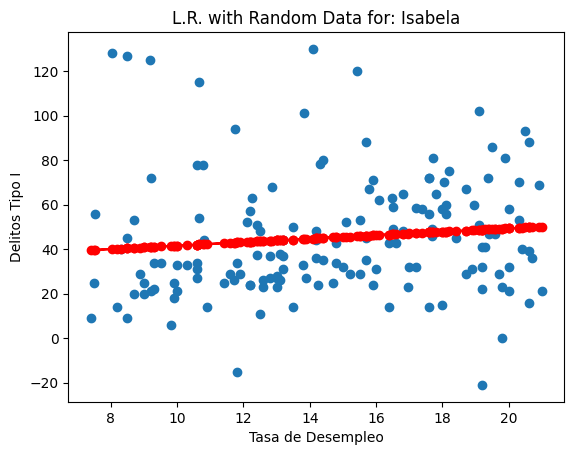

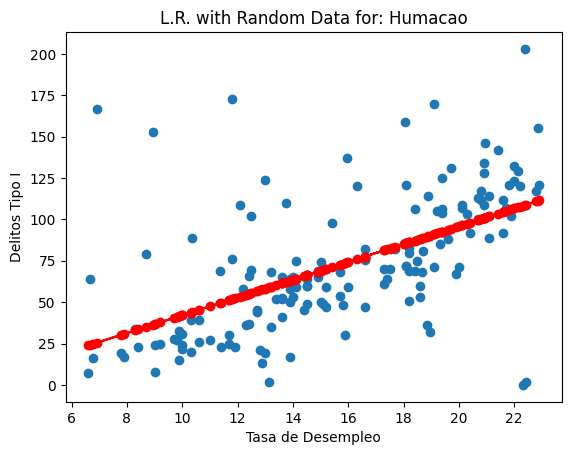

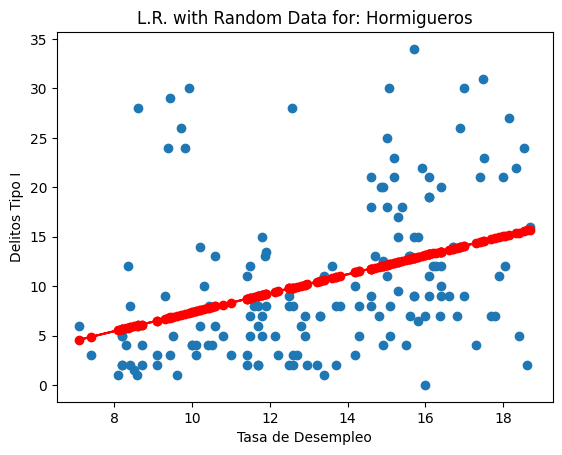

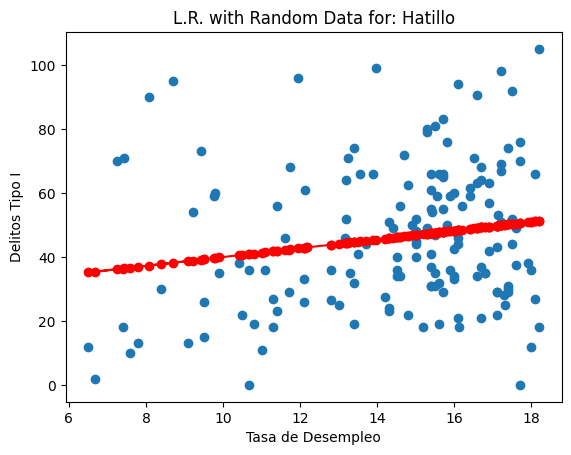

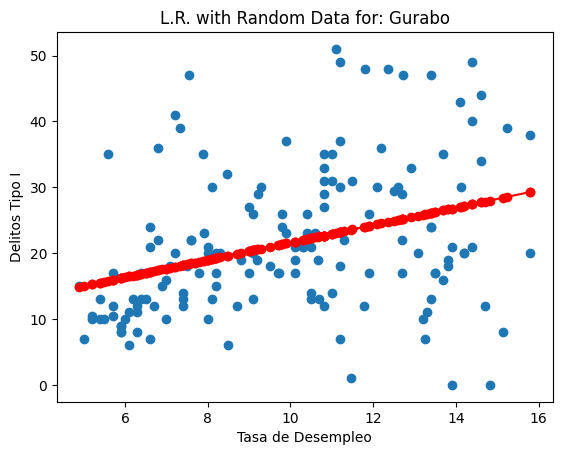

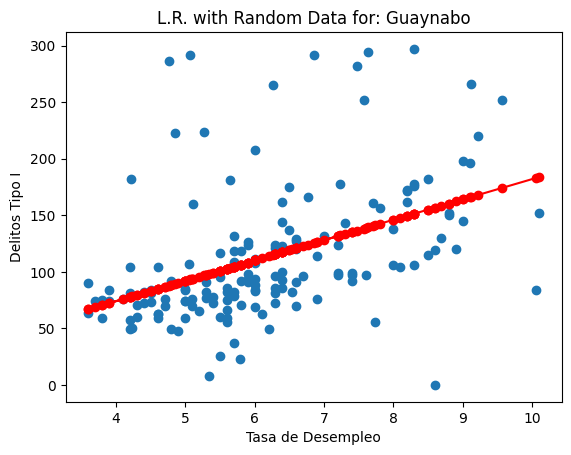

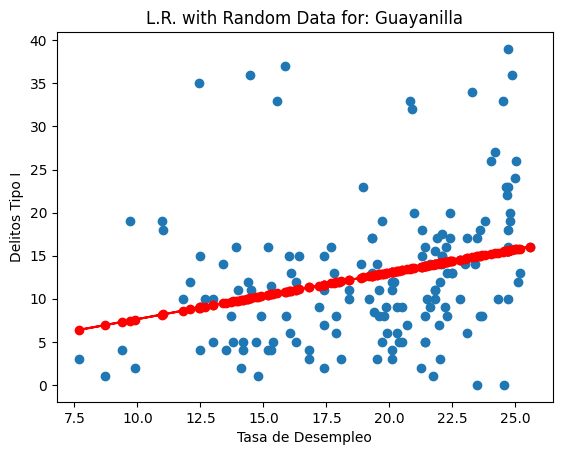

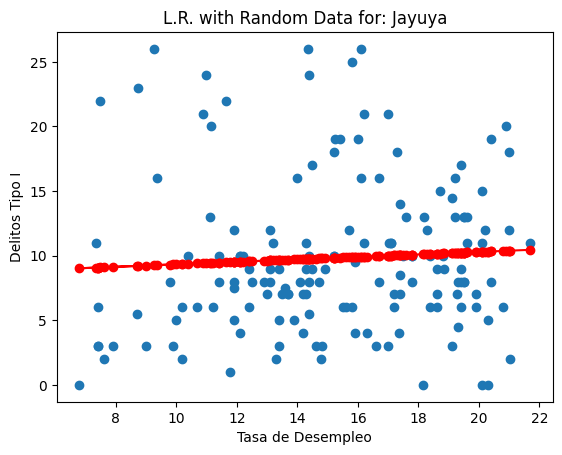

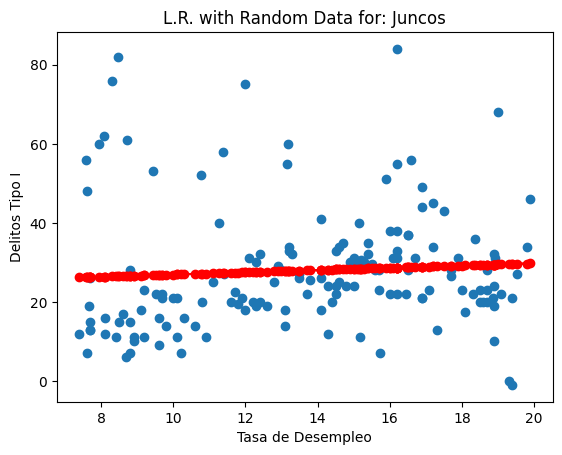

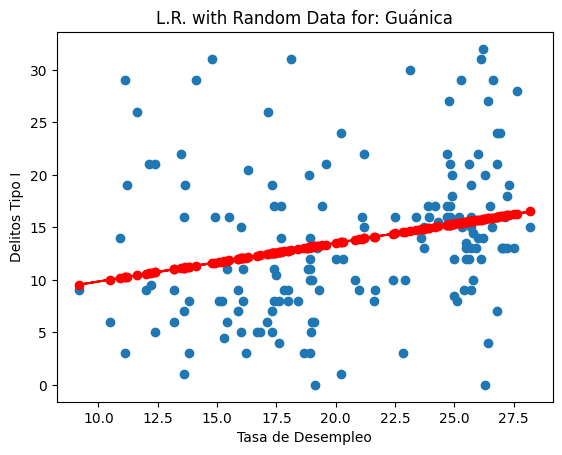

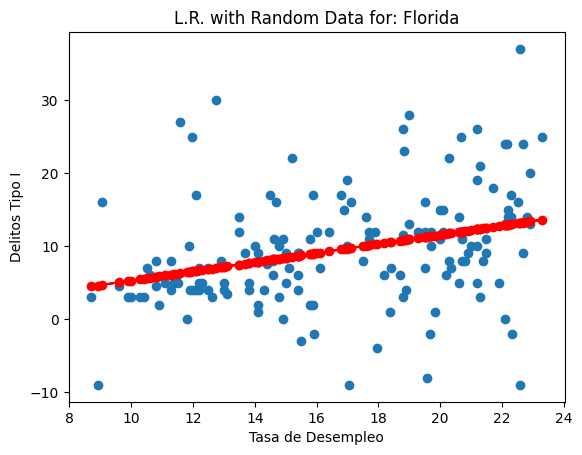

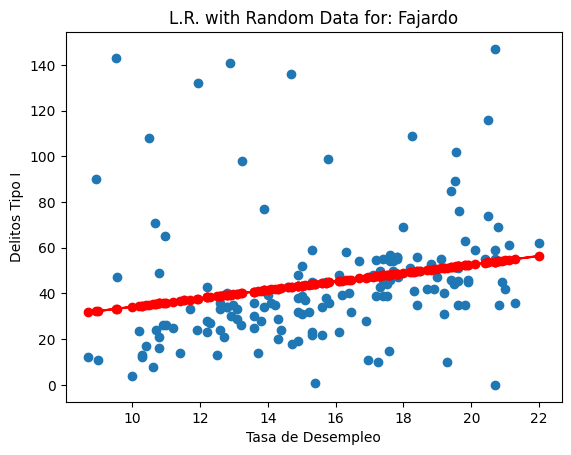

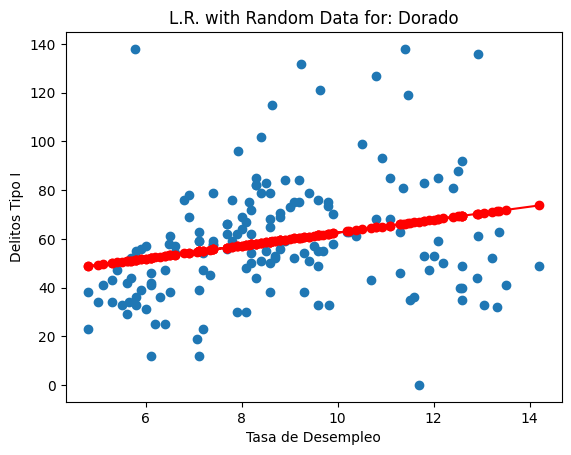

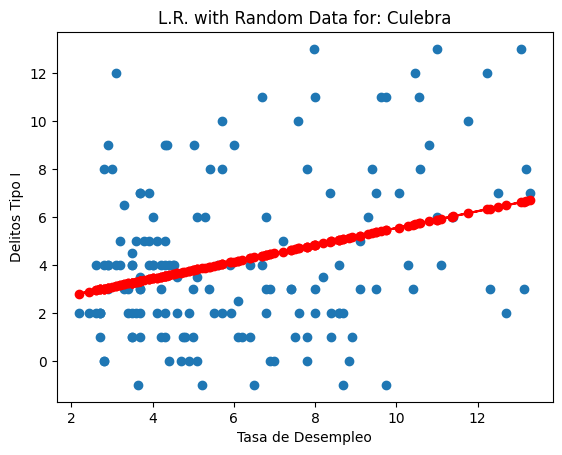

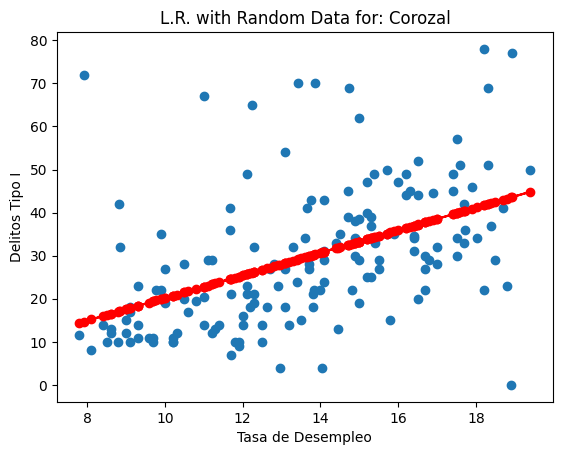

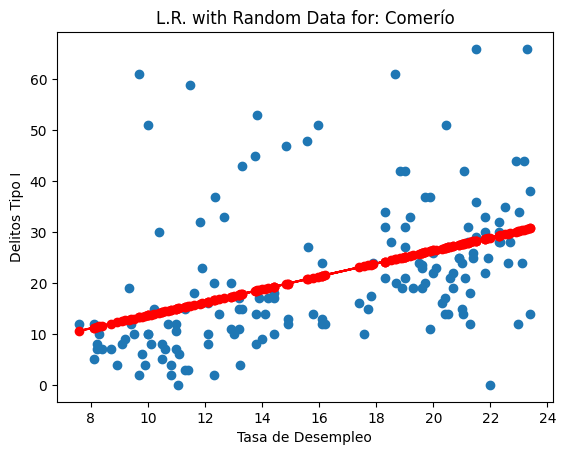

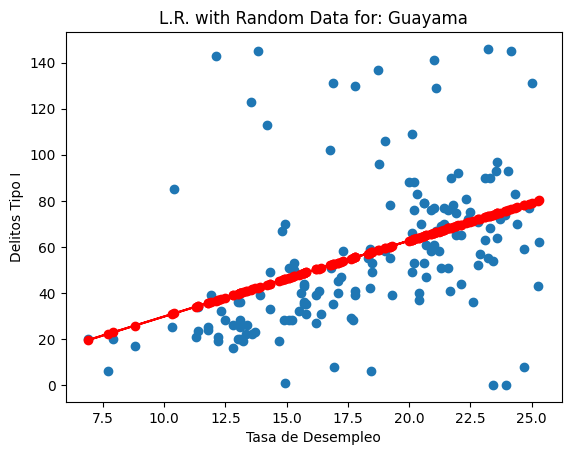

In [67]:
municipios = list(data['Distrito'].unique())

# Random scores
rand_scores = []

# For every pueblo: 
for municipio in municipios:

    # Create a df with the info from the particular municipality
    pueblo = data.loc[data["Distrito"] == municipio]
    pueblo.reset_index(drop=True, inplace=True)

    # This gives me random data between the min and max of the respective column 
    rand_tipoI = [randint(min(pueblo["Tipo I"]), max(pueblo["Tipo I"])) for x in range(30)]
    rand_desempleo = [round(uniform(min(pueblo["Tasa de Desempleo"]), 
                            max(pueblo["Tasa de Desempleo"]),), 2) 
                            for x in range(30)]

    # Create a df with the random data
    rand_data = pd.DataFrame({'Tipo I': rand_tipoI, 'Tasa de Desempleo': rand_desempleo})

    # Add random data to existing df
    pueblo = pd.concat([pueblo, rand_data], ignore_index=True)

    # Plot linear regression 
    model_clean = skl.LinearRegression()
    x = pueblo['Tasa de Desempleo'].values.reshape(-1,1)
    model_clean.fit(x, pueblo['Tipo I'])
    y_pred = model_clean.predict(x)
    plt.scatter(x, pueblo['Tipo I'])
    plt.plot(x, y_pred, "r-o")
    
    # Graph info
    plt.title(f"L.R. with Random Data for: {municipio}")
    plt.xlabel("Tasa de Desempleo")
    plt.ylabel("Delitos Tipo I")

    plt.show()

    # Get the score of the model and save it on the rand_scores list
    s = model_clean.score(x,pueblo['Tipo I'])
    rand_scores.append(s)

# rand_scores